

#### **1. BUSINESS UNDERSTANDING**

#### *Objective*

The main goal is to develop models that can predict the likelihood of Alzheimer’s Disease (AD) and Alzheimer’s Disease Related Dementias (AD/ADRD) as early as possible by leveraging social determinants of health. Early identification allows for timely interventions that could slow cognitive decline, manage symptoms earlier, and improve quality of life for at-risk individuals.

#### *Importance*
Current methods for diagnosing AD/ADRD are often time-consuming, require specialist assessments, and may not be accessible to all, particularly marginalized or underserved groups. By focusing on social determinants of health, this model has the potential to:

Enable proactive healthcare interventions.
Reduce disparities in care by identifying at-risk individuals in marginalized communities.
Improve cost-efficiency in healthcare by addressing conditions earlier in the disease progression.
Business Success Criteria:

The model should accurately identify high-risk individuals for AD/ADRD based on social determinants, which may include demographic, economic, and lifestyle factors.
Predictions should be interpretable, offering insights into which factors significantly contribute to early-onset risk.
The model’s predictions should be reproducible, as DrivenData will verify the submitted models.
Ultimately, the solution should help healthcare providers prioritize early screening and support for individuals flagged by the model.

#### 2. Data Understanding
Data Source:

The dataset is sourced from the Mexican Health and Aging Study (MHAS), a longitudinal survey of adults aged 50 and older in Mexico.
MHAS provides data across various health domains, including demographics, economics, physical limitations, self-reported health, and lifestyle factors.
Data Structure:

train_features.csv: Contains the survey responses for training data, with features collected from both the 2003 and 2012 surveys.
train_labels.csv: Contains the target labels (presence of AD/ADRD) for the training dataset.
test_features.csv: Similar to train_features.csv but without the target label, used for model testing.

Key Data Attributes:

Survey Waves: Data includes responses from the 2003 and 2012 surveys. Some individuals appear in only one survey, while others are present in both.
Feature Columns:
Year-specific columns are suffixed with _03 for 2003 and _12 for 2012.
Year-agnostic columns are not suffixed, as they represent data that is either static over time or measured in both years without difference.
Types of Information Collected:
Demographics (age, gender, etc.)
Economic circumstances (income level, employment status)
Migration history (U.S. migration status, residency status)
Health and physical limitations (self-reported health, ADLs, IADLs)
Lifestyle behaviors (exercise, social activity, household composition)

**Challenges with Data**

Missing Values: Due to the survey format, missing values are present, likely from uncollected data or inapplicable questions.
Temporal Nature: Given data is from two survey years (2003 and 2012), understanding changes over time for an individual could offer insights but adds complexity.
Data Restrictions: External data is not permitted, though pre-trained models can be used if they meet specified conditions.

**Evaluation Considerations**

Models will be evaluated on both their predictive accuracy (leaderboard score) and the interpretability and completeness of model reports.
To ensure reproducibility, DrivenData will require winning participants to submit modeling code for verification of leaderboard scores.

**IMPORTING THE NECESSARY LIBRARIES**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, OrdinalEncoder
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier, GradientBoostingRegressor
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, r2_score, accuracy_score, classification_report
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.compose import ColumnTransformer
import shap
import warnings
warnings.filterwarnings('ignore')

**LOADING AND INSPECTING THE DATASETS**

In [4]:
data = pd.read_csv(r'C:\Users\hp\Documents\Data Science Projects\phase5_capstone\Early-Detection-of-Alzheimer-s-Disease-and-Related-Dementias-Using-Social-Determinants-of-Health\Original data\train_features.csv')
data_label = pd.read_csv(r'C:\Users\hp\Documents\Data Science Projects\phase5_capstone\Early-Detection-of-Alzheimer-s-Disease-and-Related-Dementias-Using-Social-Determinants-of-Health\Original data\train_labels.csv')

In [5]:
#inspecting the datasets
data.head()

,uid,age_03,urban_03,married_03,n_mar_03,edu_gru_03,n_living_child_03,migration_03,glob_hlth_03,adl_dress_03,...,rrelgimp_12,rrfcntx_m_12,rsocact_m_12,rrelgwk_12,a16a_12,a21_12,a22_12,a33b_12,a34_12,j11_12
0,aace,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.somewhat important,9.Never,9.Never,0.No,NaN,NaN,NaN,NaN,NaN,Concrete 2
1,aanz,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.very important,9.Never,1.Almost every day,0.No,NaN,NaN,NaN,NaN,NaN,Concrete 2
2,aape,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.somewhat important,6.2 or 3 times a month,2.4 or more times a week,0.No,NaN,NaN,NaN,NaN,NaN,"Wood, mosaic, or other covering 1"
3,aard,1. 50–59,"1. 100,000+",3. Widowed,1.0,3. 7–9 years,1. 1 or 2,0.0,4. Fair,0.0,...,1.very important,4.Once a week,9.Never,1.Yes,NaN,NaN,NaN,NaN,No 2,Concrete 2
4,ablr,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.very important,3.2 or 3 times a week,3.2 or 3 times a week,0.No,NaN,NaN,NaN,NaN,NaN,"Wood, mosaic, or other covering 1"


In [6]:
data_label.head()

,uid,year,composite_score
0,aace,2021,175
1,aanz,2021,206
2,aape,2016,161
3,aape,2021,144
4,aard,2021,104


In [7]:
df= pd.merge(data, data_label, on="uid", how="left")

In [9]:
df.head()

,uid,age_03,urban_03,married_03,n_mar_03,edu_gru_03,n_living_child_03,migration_03,glob_hlth_03,adl_dress_03,...,rsocact_m_12,rrelgwk_12,a16a_12,a21_12,a22_12,a33b_12,a34_12,j11_12,year,composite_score
0,aace,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,9.Never,0.No,NaN,NaN,NaN,NaN,NaN,Concrete 2,2021,175
1,aanz,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.Almost every day,0.No,NaN,NaN,NaN,NaN,NaN,Concrete 2,2021,206
2,aape,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.4 or more times a week,0.No,NaN,NaN,NaN,NaN,NaN,"Wood, mosaic, or other covering 1",2016,161
3,aape,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.4 or more times a week,0.No,NaN,NaN,NaN,NaN,NaN,"Wood, mosaic, or other covering 1",2021,144
4,aard,1. 50–59,"1. 100,000+",3. Widowed,1.0,3. 7–9 years,1. 1 or 2,0.0,4. Fair,0.0,...,9.Never,1.Yes,NaN,NaN,NaN,NaN,No 2,Concrete 2,2021,104


In [10]:
df.shape

(4343, 186)

In [11]:
df.info

<bound method DataFrame.info of        uid    age_03     urban_03                    married_03  n_mar_03  \
0     aace       NaN          NaN                           NaN       NaN   
1     aanz       NaN          NaN                           NaN       NaN   
2     aape       NaN          NaN                           NaN       NaN   
3     aape       NaN          NaN                           NaN       NaN   
4     aard  1. 50–59  1. 100,000+                    3. Widowed       1.0   
...    ...       ...          ...                           ...       ...   
4338  zzag  1. 50–59  0. <100,000  1. Married or in civil union       1.0   
4339  zzci  1. 50–59  0. <100,000                    3. Widowed       1.0   
4340  zzci  1. 50–59  0. <100,000                    3. Widowed       1.0   
4341  zzjb  1. 50–59  0. <100,000  1. Married or in civil union       1.0   
4342  zzti  1. 50–59  1. 100,000+  1. Married or in civil union       3.0   

           edu_gru_03 n_living_child_03  mi

In [12]:
df.dtypes

uid                 object
age_03              object
urban_03            object
married_03          object
n_mar_03           float64
                    ...   
a33b_12             object
a34_12              object
j11_12              object
year                 int64
composite_score      int64
Length: 186, dtype: object

**EXPLORATORY DATA ANALYSIS**

In [13]:
# Summary of missing values
missing_values = df.isnull().sum().sort_values(ascending=False)
print("Missing Values:\n", missing_values[missing_values > 0])


Missing Values:
 a16a_12           4309
a22_12            4295
a21_12            4288
a33b_12           4288
rjlocc_m_03       3943
                  ... 
rearnings_12       107
migration_12       107
employment_12      107
pem_def_mar_12     107
j11_12              89
Length: 182, dtype: int64


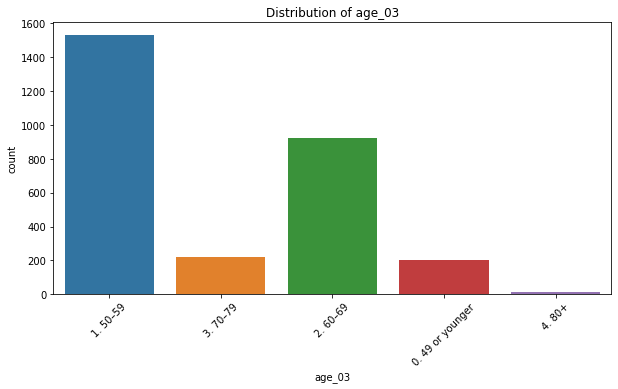

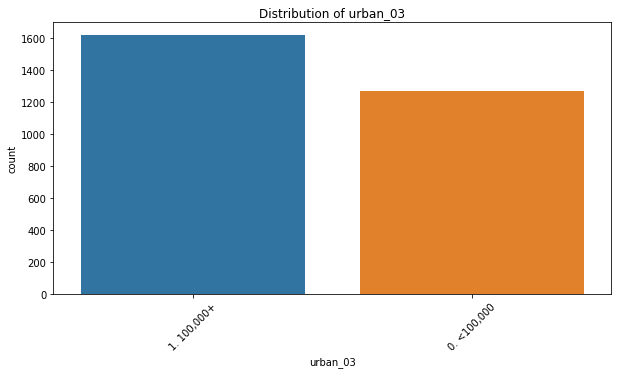

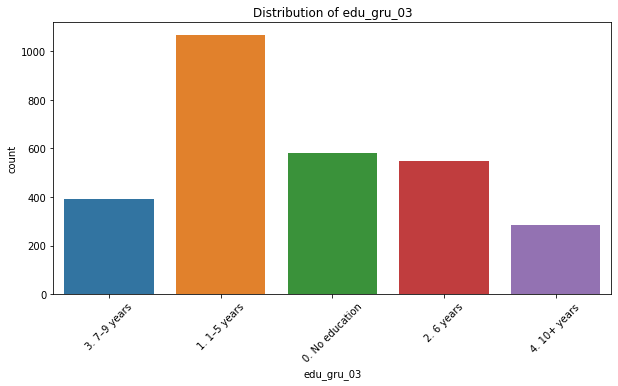

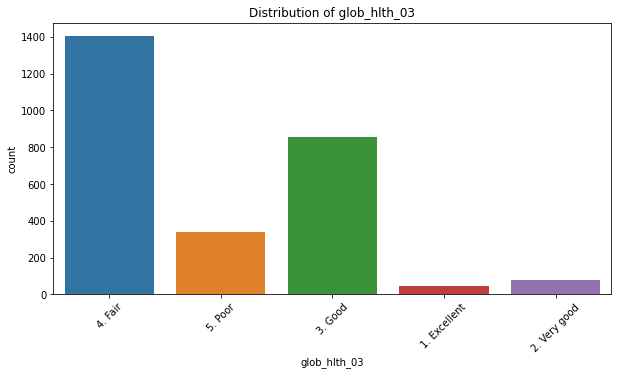

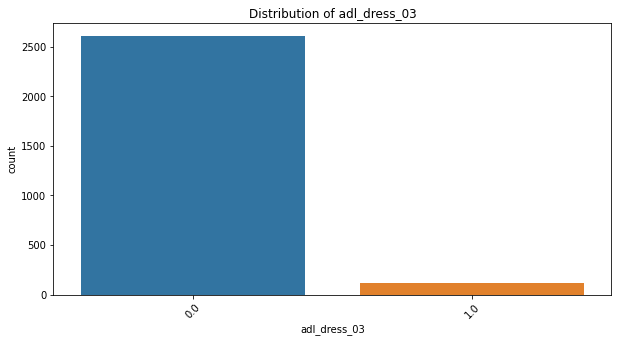

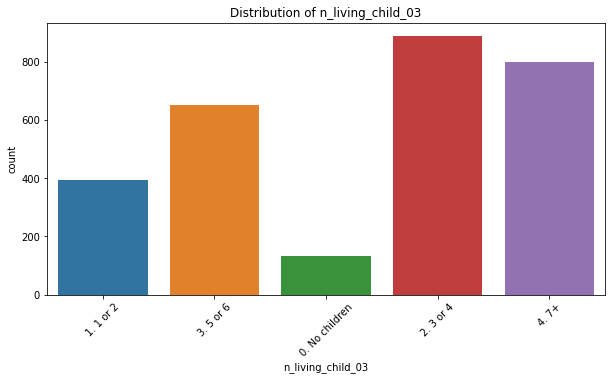

In [14]:
# List of categorical columns
cat_cols = ['age_03', 'urban_03', 'edu_gru_03', 'glob_hlth_03', 'adl_dress_03', 'n_living_child_03']

# Count plots
for col in cat_cols:
    plt.figure(figsize=(10, 5))
    sns.countplot(data=df, x=col)
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)
    plt.show()


**COUNTPLOTS**

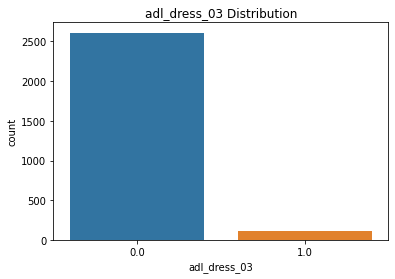

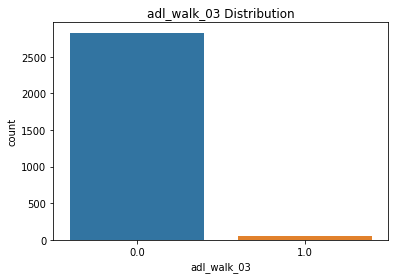

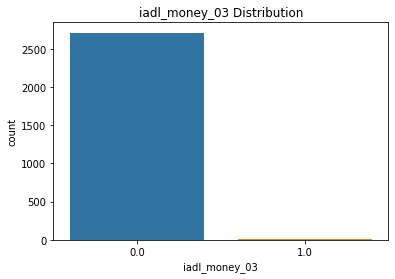

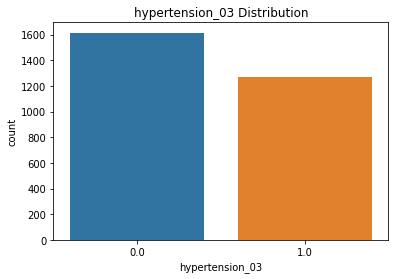

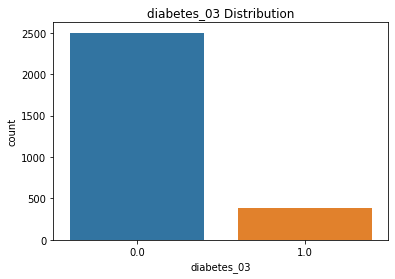

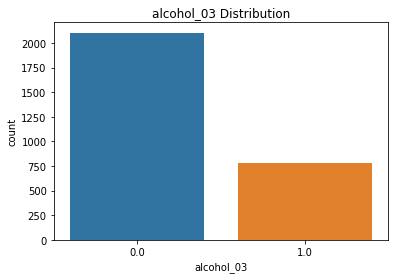

In [15]:
binary_cols = ['adl_dress_03', 'adl_walk_03', 'iadl_money_03', 'hypertension_03', 'diabetes_03', 'alcohol_03']

# Loop through and plot binary distributions
for col in binary_cols:
    plt.figure(figsize=(6, 4))
    sns.countplot(data=df, x=col)
    plt.title(f'{col} Distribution')
    plt.show()


**DISTRIBUTION PLOTS**

In [16]:
# Continuous variables
cont_cols = ['n_mar_03', 'n_adl_03', 'n_iadl_03', 'n_depr_03', 'n_illnesses_03']

# Summary statistics
print("Summary Statistics:\n", data[cont_cols].describe())


Summary Statistics:
           n_mar_03     n_adl_03    n_iadl_03    n_depr_03  n_illnesses_03
count  2222.000000  2234.000000  2105.000000  2100.000000     2241.000000
mean      1.134113     0.068487     0.047506     3.484286        0.979027
std       0.482953     0.392793     0.296726     2.665439        0.960844
min       0.000000     0.000000     0.000000     0.000000        0.000000
25%       1.000000     0.000000     0.000000     1.000000        0.000000
50%       1.000000     0.000000     0.000000     3.000000        1.000000
75%       1.000000     0.000000     0.000000     5.000000        2.000000
max       5.000000     5.000000     4.000000     9.000000        5.000000


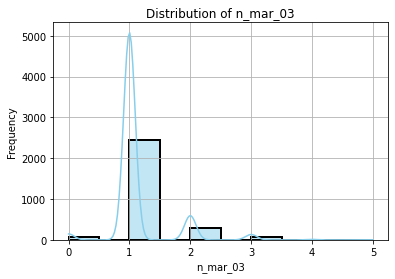

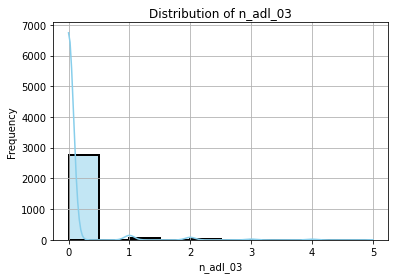

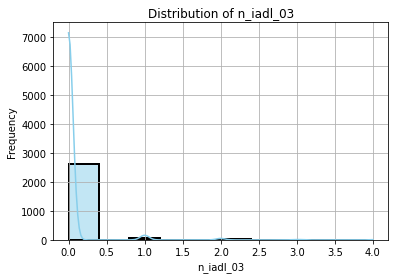

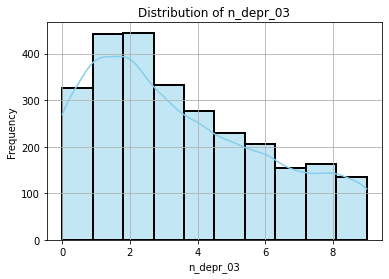

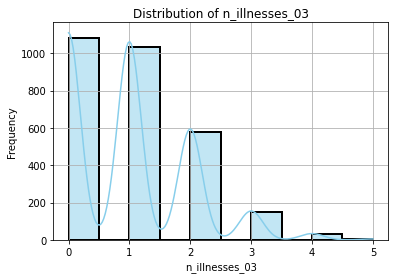

In [17]:
for col in cont_cols:
  plt.figure(figsize=(6, 4))
  sns.histplot(data=df, x=col, bins=10, kde=True, color='skyblue', linewidth=2)
  plt.title(f'Distribution of {col}')
  plt.xlabel(col) 
  plt.ylabel('Frequency')
  plt.grid(True)
  plt.show()


**CORRELATION MATRIX**

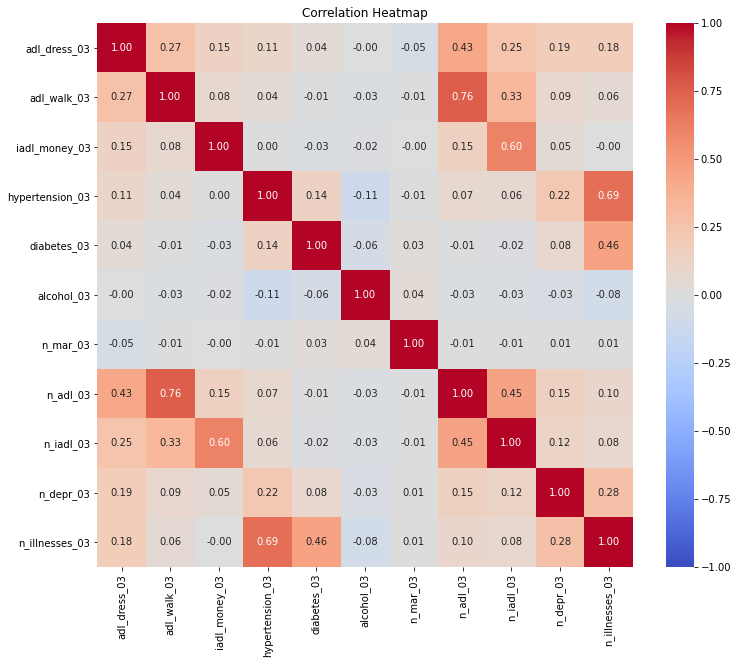

In [18]:
# Selecting columns for correlation analysis
corr_cols = binary_cols + cont_cols

# Computing correlation matrix
corr_matrix = df[corr_cols].corr()

# Plotting heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()


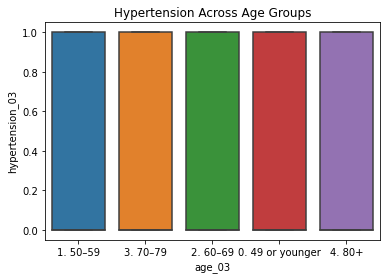

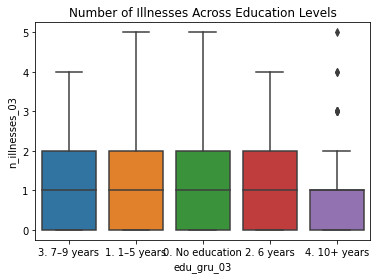

In [19]:
# Age vs. health condition (e.g., hypertension_03)
sns.boxplot(data=data, x='age_03', y='hypertension_03')
plt.title('Hypertension Across Age Groups')
plt.show()

# Education level vs. number of illnesses
sns.boxplot(data=data, x='edu_gru_03', y='n_illnesses_03')
plt.title('Number of Illnesses Across Education Levels')
plt.show()


#### DATA CLEANING

In [20]:
df.head()

,uid,age_03,urban_03,married_03,n_mar_03,edu_gru_03,n_living_child_03,migration_03,glob_hlth_03,adl_dress_03,...,rsocact_m_12,rrelgwk_12,a16a_12,a21_12,a22_12,a33b_12,a34_12,j11_12,year,composite_score
0,aace,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,9.Never,0.No,NaN,NaN,NaN,NaN,NaN,Concrete 2,2021,175
1,aanz,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.Almost every day,0.No,NaN,NaN,NaN,NaN,NaN,Concrete 2,2021,206
2,aape,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.4 or more times a week,0.No,NaN,NaN,NaN,NaN,NaN,"Wood, mosaic, or other covering 1",2016,161
3,aape,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.4 or more times a week,0.No,NaN,NaN,NaN,NaN,NaN,"Wood, mosaic, or other covering 1",2021,144
4,aard,1. 50–59,"1. 100,000+",3. Widowed,1.0,3. 7–9 years,1. 1 or 2,0.0,4. Fair,0.0,...,9.Never,1.Yes,NaN,NaN,NaN,NaN,No 2,Concrete 2,2021,104


In [21]:
missing_percentage = df.isnull().mean() * 100

# Display the missing percentage
print("Missing Value Percentage:\n", missing_percentage)

# Drop columns with over 50% missing values
df = df.loc[:, missing_percentage <= 50]

Missing Value Percentage:
 uid                 0.000000
age_03             33.525213
urban_03           33.479162
married_03         33.479162
n_mar_03           34.123878
                     ...    
a33b_12            98.733594
a34_12             36.863919
j11_12              2.049275
year                0.000000
composite_score     0.000000
Length: 186, dtype: float64


In [22]:
df.shape

(4343, 173)

In [23]:
from sklearn.impute import SimpleImputer

# Separate numerical and categorical columns
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = df.select_dtypes(include=['object']).columns

# Create imputer objects
num_imputer = SimpleImputer(strategy='median')  # For numerical columns
cat_imputer = SimpleImputer(strategy='most_frequent')  # For categorical columns

# Fill missing values in numerical columns
df[numerical_cols] = num_imputer.fit_transform(df[numerical_cols])

# Fill missing values in categorical columns
df[categorical_cols] = cat_imputer.fit_transform(df[categorical_cols])


**Mapping Categorical Columns in the Data**

In this section, we convert categorical data into numerical data through mapping. We will first identify the catergorical columns the create a mapping dictionary for each of the categorical variables. The variables will be assigned numbers eg 1, 2, 3, 4 according to how they appear on the dataset

In [24]:
#extracting categorical columns
categorical_columns = df.select_dtypes(include='object')
for col in categorical_columns:
    print(f"Unique values in '{col}': {df[col].unique()}")


Unique values in 'uid': ['aace' 'aanz' 'aape' ... 'zzci' 'zzjb' 'zzti']
Unique values in 'age_03': ['1. 50–59' '3. 70–79' '2. 60–69' '0. 49 or younger' '4. 80+']
Unique values in 'urban_03': ['1. 100,000+' '0. <100,000']
Unique values in 'married_03': ['1. Married or in civil union' '3. Widowed' '4. Single'
 '2. Separated or divorced']
Unique values in 'edu_gru_03': ['1. 1–5 years' '3. 7–9 years' '0. No education' '2. 6 years'
 '4. 10+ years']
Unique values in 'n_living_child_03': ['2. 3 or 4' '1. 1 or 2' '3. 5 or 6' '0. No children' '4. 7+']
Unique values in 'glob_hlth_03': ['4. Fair' '5. Poor' '3. Good' '1. Excellent' '2. Very good']
Unique values in 'employment_03': ['1. Currently Working' '3. Dedicated to household chores'
 '2. Currently looking for work'
 '4. Retired, incapacitated, or does not work']
Unique values in 'age_12': ['2. 60–69' '1. 50–59' '4. 80+' '3. 70–79' '0. 49 or younger']
Unique values in 'urban_12': ['0. <100,000' '1. 100,000+']
Unique values in 'married_12': ['

From the above output, we can see that some features have this format: ['0. No Education, 1. 1-5Years]. We will deal with thes columns by mapping them.

In [25]:
# Define mappings for each categorical column
mappings = {
    'age_03': {
        '1. 50–59': 1,
        '3. 70–79': 3,
        '2. 60–69': 2,
        '0. 49 or younger': 0,
        '4. 80+': 4
    },
    'urban_03': {
        '1. 100,000+': 1,
        '0. <100,000': 0
    },
    'married_03': {
        '3. Widowed': 3,
        '1. Married or in civil union': 1,
        '4. Single': 4,
        '2. Separated or divorced': 2
    },
    'edu_gru_03': {
        '3. 7–9 years': 3,
        '1. 1–5 years': 1,
        '0. No education': 0,
        '2. 6 years': 2,
        '4. 10+ years': 4
    },
    'n_living_child_03': {
        '1. 1 or 2': 1,
        '3. 5 or 6': 3,
        '0. No children': 0,
        '2. 3 or 4': 2,
        '4. 7+': 4
    },
    'glob_hlth_03': {
        '4. Fair': 4,
        '5. Poor': 5,
        '3. Good': 3,
        '1. Excellent': 1,
        '2. Very good': 2
    },
    'employment_03': {
        '3. Dedicated to household chores': 3,
        '1. Currently Working': 1,
        '2. Currently looking for work': 2,
        '4. Retired, incapacitated, or does not work': 4
    },
    'age_12': {
        '2. 60–69': 2,
        '1. 50–59': 1,
        '4. 80+': 4,
        '3. 70–79': 3,
        '0. 49 or younger': 0
    },
    'urban_12': {
        '0. <100,000': 0,
        '1. 100,000+': 1
    },
    'married_12': {
        '1. Married or in civil union': 1,
        '3. Widowed': 3,
        '2. Separated or divorced': 2,
        '4. Single': 4
    },
    'edu_gru_12': {
        '0. No education': 0,
        '3. 7–9 years': 3,
        '1. 1–5 years': 1,
        '2. 6 years': 2,
        '4. 10+ years': 4
    },
    'n_living_child_12': {
        '1. 1 or 2': 1,
        '3. 5 or 6': 3,
        '0. No children': 0,
        '2. 3 or 4': 2,
        '4. 7+': 4
    },
    'glob_hlth_12': {
        '4. Fair': 4,
        '3. Good': 3,
        '2. Very good': 2,
        '5. Poor': 5,
        '1. Excellent': 1
    },
    'bmi_12': {
        '3. Overweight': 3,
        '4. Obese': 4,
        '2. Normal weight': 2,
        '1. Underweight': 1,
        '5. Morbidly obese': 5
    },
    'decis_famil_12': {
        '2. Approximately equal weight': 2,
        '3. Spouse': 3,
        '1. Respondent': 1
    },
    'decis_personal_12': {
        '1. A lot': 1,
        '2. A little': 2,
        '3. None': 3
    },
    'employment_12': {
        '1. Currently Working': 1,
        '2. Currently looking for work': 2,
        '3. Dedicated to household chores': 3,
        '4. Retired, incapacitated, or does not work': 4
    },
    'satis_ideal_12': {
        '3. Disagrees': 3,
        '1. Agrees': 1,
        '2. Neither agrees nor disagrees': 2
    },
    'satis_excel_12': {
        '3. Disagrees': 3,
        '2. Neither agrees nor disagrees': 2,
        '1. Agrees': 1
    },
    'satis_fine_12': {
        '1. Agrees': 1,
        '3. Disagrees': 3,
        '2. Neither agrees nor disagrees': 2
    },
    'cosas_imp_12': {
        '1. Agrees': 1,
        '2. Neither agrees nor disagrees': 2,
        '3. Disagrees': 3
    },
    'wouldnt_change_12': {
        '3. Disagrees': 3,
        '1. Agrees': 1,
        '2. Neither agrees nor disagrees': 2
    },
    'memory_12': {
        '2. Very good': 2,
        '4. Fair': 4,
        '3. Good': 3,
        '5. Poor': 5,
        '1. Excellent': 1
    },
    'ragender': {
        '1.Man': 1,
        '2.Woman': 2
    },
    'rameduc_m': {
        '1.None': 1,
        '2.Some primary': 2,
        '3.Primary': 3,
        '4.More than primary': 4
    },
    'rafeduc_m': {
        '1.None': 1,
        '2.Some primary': 2,
        '4.More than primary': 4,
        '3.Primary': 3
    },
    'sgender_03': {
        '2.Woman': 2,
        '1.Man': 1
    },
    'rrelgimp_03': {
        '1.very important': 1,
        '2.somewhat important': 2,
        '3.not important': 3
    },
    'sgender_12': {
        '2.Woman': 2,
        '1.Man': 1
    },
    'rjlocc_m_12': {
        '6.Workers in Agriculture, Livestock, Forestry, and Fishing': 6,
        '18.Safety and Security Personnel': 18,
        '8.Artisans and Workers in Production, Repair, Maintenance': 8,
        '14.Merchants and Sales Representatives': 14,
        '17.Domestic Workers': 17,
        '9.Operators of Fixed Machinery and Equipment for Ind. Production': 9,
        '15.Traveling Salespeople and Traveling Salespeople of Services': 15,
        '16.Workers in the Service Industry': 16,
        '4.Workers in Art, Shows, and Sports': 4,
        '3.Educators': 3,
        '12.Department Heads/Coordinators/Supervisors in Admin and Service Activities': 12,
        '10.Asst/Laborers etc in Ind. Production, Repair, Maintenance': 10,
        '1.Professionals': 1,
        '13.Administrative Support Staff': 13,
        '11.Drivers and Asst Drivers of Mobile Machinery and Transport Vehicles': 11,
        '7.Bosses/Supervisors etc in Artistic, Ind. Production, Repair, Maintenance Activities': 7,
        '2.Technicians': 2,
        '5.Officials and Directors Public, Private, and Social Sectors': 5
    },
    'rrelgimp_12': {
        '2.somewhat important': 2,
        '1.very important': 1,
        '3.not important': 3
    },
    'rrfcntx_m_12': {
        '9.Never': 9,
        '6.2 or 3 times a month': 6,
        '4.Once a week': 4,
        '3.2 or 3 times a week': 3,
        '8.Almost Never, sporadic': 8,
        '1.Almost every day': 1,
        '2.4 or more times a week': 2,
        '7.Once a month': 7,
        '5.4 or more times a month': 5
    },
    'rsocact_m_12': {
        '9.Never': 9,
        '1.Almost every day': 1,
        '2.4 or more times a week': 2,
        '3.2 or 3 times a week': 3,
        '4.Once a week': 4,
        '8.Almost Never, sporadic': 8,
        '5.2 or 3 times a month': 5,
        '6.Once a month': 6,
        '7.4 or more times a month': 7
    },
    'rrelgwk_12': {
        '0.No': 0,
        '1.Yes': 1
    },
    'a34_12': {
        'No 2': 0,
        'Yes 1': 1
    },
    'j11_12': {
        'Wood, mosaic, or other covering 1': 1,
        'Concrete 2': 2,
        'Mud 3': 3
    }
}



In [26]:
#applying the mappings to the columns 
for column, mapping in mappings.items():
    df[column] = df[column].map(mapping)

In [27]:
#investigating the columns
df

,uid,age_03,urban_03,married_03,n_mar_03,edu_gru_03,n_living_child_03,migration_03,glob_hlth_03,adl_dress_03,...,rinc_pension_12,sinc_pension_12,rrelgimp_12,rrfcntx_m_12,rsocact_m_12,rrelgwk_12,a34_12,j11_12,year,composite_score
0,aace,1,1,1,1.0,1,2,0.0,4,0.0,...,0.0,0.0,2,9,9.0,0,0,2,2021.0,175.0
1,aanz,1,1,1,1.0,1,2,0.0,4,0.0,...,0.0,0.0,1,9,1.0,0,0,2,2021.0,206.0
2,aape,1,1,1,1.0,1,2,0.0,4,0.0,...,0.0,0.0,2,6,2.0,0,0,1,2016.0,161.0
3,aape,1,1,1,1.0,1,2,0.0,4,0.0,...,0.0,0.0,2,6,2.0,0,0,1,2021.0,144.0
4,aard,1,1,3,1.0,3,1,0.0,4,0.0,...,0.0,0.0,1,4,9.0,1,0,2,2021.0,104.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4338,zzag,1,0,1,1.0,1,4,0.0,5,0.0,...,0.0,0.0,1,9,4.0,1,0,2,2021.0,152.0
4339,zzci,1,0,3,1.0,1,1,0.0,4,0.0,...,0.0,0.0,1,9,9.0,1,0,2,2016.0,140.0
4340,zzci,1,0,3,1.0,1,1,0.0,4,0.0,...,0.0,0.0,1,9,9.0,1,0,2,2021.0,121.0
4341,zzjb,1,0,1,1.0,0,2,0.0,3,0.0,...,0.0,0.0,1,9,9.0,0,0,2,2021.0,32.0


In [28]:
df.dtypes

uid                 object
age_03               int64
urban_03             int64
married_03           int64
n_mar_03           float64
                    ...   
rrelgwk_12           int64
a34_12               int64
j11_12               int64
year               float64
composite_score    float64
Length: 173, dtype: object

In [29]:
data.duplicated().sum()

0

**MODELLING**

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor


In [ ]:
# Separate features and target variable
X = df.drop(columns=['composite_score', 'year', 'uid'])
y = df['composite_score']

# Identify categorical and numerical columns
cat_cols = X.select_dtypes(include=['object']).columns
num_cols = X.select_dtypes(include=['float', 'int']).columns

# Creating transformers for preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_cols),
        ('cat', OneHotEncoder(drop='first'), cat_cols)
    ]
)


In [ ]:
#defining models to test
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(),
    'Decision Tree': DecisionTreeRegressor(),
    'Support Vector Regressor': SVR(),
    'K-Nearest Neighbors': KNeighborsRegressor()
}


**Building a Pipeline for each model**

In [72]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Evaluate each model
results = {}
for name, model in models.items():
    pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('model', model)])
    pipeline.fit(X_train, y_train)
    
    # Predictions
    y_pred = pipeline.predict(X_test)
    
    # Calculate RMSE
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    results[name] = rmse
    print(f"{name} RMSE: {rmse:.3f}")


Linear Regression RMSE: 41.368
Random Forest RMSE: 37.690
Decision Tree RMSE: 49.240
Support Vector Regressor RMSE: 49.029
K-Nearest Neighbors RMSE: 48.582


**HYPERPARAMETER TUNING**

In [75]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'model__n_estimators': [50, 100, 200],
    'model__max_depth': [None, 10, 20, 30],
    'model__min_samples_split': [2, 5, 10]
}

pipeline_rf = Pipeline(steps=[('preprocessor', preprocessor), ('model', RandomForestRegressor())])
grid_search = GridSearchCV(pipeline_rf, param_grid, cv=5, scoring='neg_root_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best parameters and score
print("Best parameters found: ", grid_search.best_params_)
print("Best RMSE from Grid Search: ", -grid_search.best_score_)


Best parameters found:  {'model__max_depth': None, 'model__min_samples_split': 2, 'model__n_estimators': 200}
Best RMSE from Grid Search:  39.300165992283


In [77]:
from sklearn.ensemble import GradientBoostingRegressor

# Define the model
gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Create a pipeline
pipeline_gb = Pipeline(steps=[('preprocessor', preprocessor), ('model', gb_model)])

# Fit the model
pipeline_gb.fit(X_train, y_train)

# Predictions
y_pred_gb = pipeline_gb.predict(X_test)

# Calculate RMSE
rmse_gb = mean_squared_error(y_test, y_pred_gb, squared=False)
print(f"Gradient Boosting RMSE: {rmse_gb:.3f}")


Gradient Boosting RMSE: 39.578
